In [2]:
import pandas as pd
df = pd.read_csv(r"C:\Users\willf\OneDrive\Documents\NYDSA\Reviews Project\Review Data_Faiza - 2.csv", encoding_errors='ignore')


In [3]:
df.head()

,CR_Category,Product_Name,CS Rating,Product_Link,Amazon_Link,ASIN,Rating,Google Rating,Google No Reviews,Ratings_Total
0,Baby Monitors,Motorola VM64 Baby Monitor,60,NaN,NaN,B0B3NB4BWG,4.1,1.9,59.0,91.0
1,Noise Cancelling Headphones,House of Marley Redemption ANC,72,https://www.consumerreports.org/electronics-co...,https://www.amazon.com/dp/B083V54RGT?tag=dprmd...,B083V54RGT,3.6,3.2,117.0,413.0
2,Upright Vacuum Cleaners,Dirt Devil Endura Pro Pet UD70188,44,https://www.consumerreports.org/appliances/vac...,https://www.amazon.com/dp/B0B5HNNKHM?tag=dprmd...,B0B5HNNKHM,3.0,3.2,689.0,34.0
3,Upright Vacuum Cleaners,Dirt Devil Endura Max UD70174,44,https://www.consumerreports.org/appliances/vac...,https://www.amazon.com/dp/B07G321RVQ?tag=dprmd...,B07G321RVQ,4.3,3.3,2572.0,66.0
4,Upright Vacuum Cleaners,Dirt Devil Power Max Pet UD76710,39,https://www.consumerreports.org/appliances/vac...,https://www.amazon.com/dp/B0B1F7YHMZ?tag=dprmd...,B0B1F7YHMZ,4.3,3.4,1134.0,68.0


In [4]:
cols = ['CR_Category', 'Product_Name', 'CS Rating', 'ASIN', 'Rating', 'Google Rating', 'Google No Reviews', 'Ratings_Total']
df_filt = df[cols]
df_filt.head()

,CR_Category,Product_Name,CS Rating,ASIN,Rating,Google Rating,Google No Reviews,Ratings_Total
0,Baby Monitors,Motorola VM64 Baby Monitor,60,B0B3NB4BWG,4.1,1.9,59.0,91.0
1,Noise Cancelling Headphones,House of Marley Redemption ANC,72,B083V54RGT,3.6,3.2,117.0,413.0
2,Upright Vacuum Cleaners,Dirt Devil Endura Pro Pet UD70188,44,B0B5HNNKHM,3.0,3.2,689.0,34.0
3,Upright Vacuum Cleaners,Dirt Devil Endura Max UD70174,44,B07G321RVQ,4.3,3.3,2572.0,66.0
4,Upright Vacuum Cleaners,Dirt Devil Power Max Pet UD76710,39,B0B1F7YHMZ,4.3,3.4,1134.0,68.0


In [5]:
df_filt1= df_filt[(df_filt['Ratings_Total']>50) & (df_filt['Google No Reviews']>50)]
df_filt1.shape[0]

197

In [6]:
df_filt1[df_filt1['Google Rating']>5]

,CR_Category,Product_Name,CS Rating,ASIN,Rating,Google Rating,Google No Reviews,Ratings_Total


In [7]:
print(f"Amazon Ratings\n{df_filt1['Rating'].describe()}\nGoogle Ratings\n{df_filt1['Google Rating'].describe()}")

Amazon Ratings
count    197.000000
mean       4.341624
std        0.292410
min        3.000000
25%        4.200000
50%        4.400000
75%        4.600000
max        5.000000
Name: Rating, dtype: float64
Google Ratings
count    197.000000
mean       4.357868
std        0.390710
min        1.900000
25%        4.200000
50%        4.400000
75%        4.600000
max        4.900000
Name: Google Rating, dtype: float64


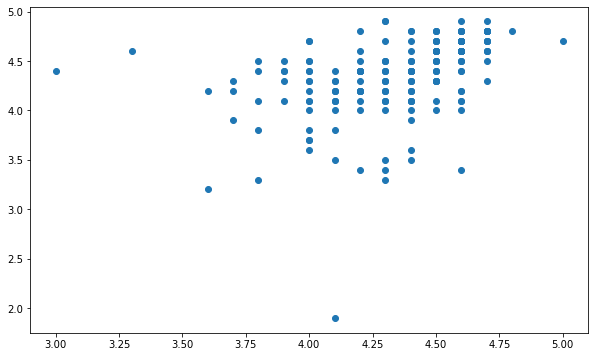

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(df_filt1['Rating'], df_filt1['Google Rating'])
plt.show()


In [9]:
# Get Pearson corr of AMZ vs GOOG ratings
from scipy.stats import pearsonr

corr_coefficient, p_value = pearsonr(df_filt1['Rating'], df_filt1['Google Rating'])
print(f"Pearson Correlation Coefficient: {corr_coefficient}")
print(f"P-value: {p_value}")



c:\Users\willf\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Pearson Correlation Coefficient: 0.4227073825624009
P-value: 6.103793689760203e-10


In [10]:
# Alt corr (Spearman)
correlation = df_filt1['Rating'].corr(df_filt1['Google Rating'], method='spearman')
print(correlation)

0.5637230388969352


In [11]:
df_f = df_filt1.copy()

In [12]:
# Look at difference between ratings for each product
df_f['score_diff'] = df_f['Rating'] - df_f['Google Rating']

In [13]:
df_f.head()

,CR_Category,Product_Name,CS Rating,ASIN,Rating,Google Rating,Google No Reviews,Ratings_Total,score_diff
0,Baby Monitors,Motorola VM64 Baby Monitor,60,B0B3NB4BWG,4.1,1.9,59.0,91.0,2.2
1,Noise Cancelling Headphones,House of Marley Redemption ANC,72,B083V54RGT,3.6,3.2,117.0,413.0,0.4
3,Upright Vacuum Cleaners,Dirt Devil Endura Max UD70174,44,B07G321RVQ,4.3,3.3,2572.0,66.0,1.0
4,Upright Vacuum Cleaners,Dirt Devil Power Max Pet UD76710,39,B0B1F7YHMZ,4.3,3.4,1134.0,68.0,0.9
5,Upright Vacuum Cleaners,Hoover MaxLife PowerDrive Swivel XL UH75110,53,B0B5HSL9YH,4.1,3.5,812.0,53.0,0.6


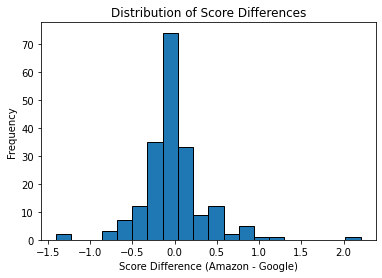

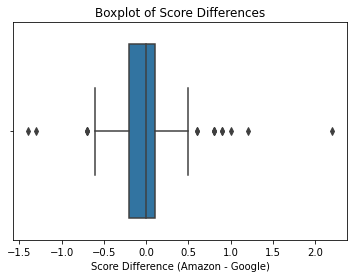

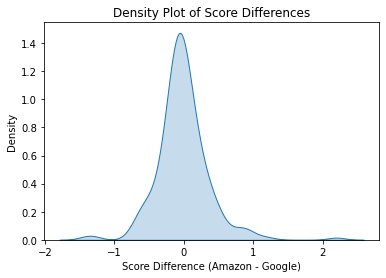

In [26]:
# Create various charts of distribution of differences between AMZ & GOOG product ratings
import seaborn as sns

# Histogram
plt.hist(df_f['score_diff'], bins=20, edgecolor='black')
plt.title('Distribution of Score Differences')
plt.xlabel('Score Difference (Amazon - Google)')
plt.ylabel('Frequency')
plt.show()

# Boxplot
sns.boxplot(x=df_f['score_diff'])
plt.title('Boxplot of Score Differences')
plt.xlabel('Score Difference (Amazon - Google)')
plt.show()

# Density Plot
sns.kdeplot(df_f['score_diff'], fill=True)
plt.title('Density Plot of Score Differences')
plt.xlabel('Score Difference (Amazon - Google)')
plt.show()

In [27]:
# Basic stats on difference in product ratings
mean_diff = df_f['score_diff'].mean()
std_diff = df_f['score_diff'].std()
median_diff = df_f['score_diff'].median()

print(f"Mean score difference: {mean_diff}")
print(f"Standard deviation of score difference: {std_diff}")
print(f"Median score difference: {median_diff}")


Mean score difference: -0.016243654822335078
Standard deviation of score difference: 0.37625992633572564
Median score difference: 0.0


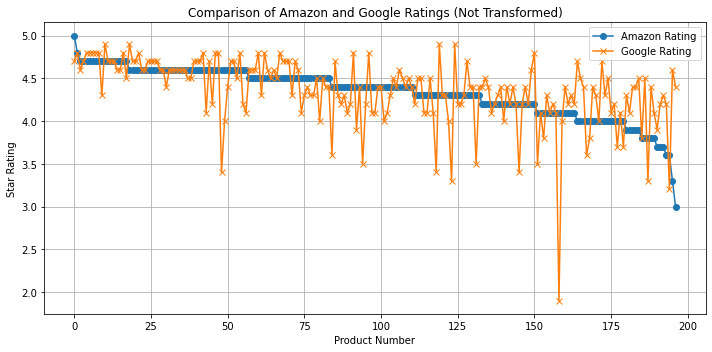

In [17]:
# Plot AMZ vs GOOG product ratings line plot ordered by AMZ ratings desc
df_sorted = df_f.sort_values('Rating', ascending = False)

df_sorted = df_sorted.reset_index(drop=True)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(df_sorted.index, df_sorted['Rating'], marker='o', label='Amazon Rating')
plt.plot(df_sorted.index, df_sorted['Google Rating'], marker='x', label='Google Rating')

plt.title('Comparison of Amazon and Google Ratings (Not Transformed)')
plt.xlabel('Product Number')
plt.ylabel('Star Rating')
plt.legend()
plt.grid(True)
# plt.text(25,2.1, 'Pearson Correlation Coefficient: 0.42\nP-value: 6.1 e-10', fontsize=12)
plt.tight_layout()
plt.show()

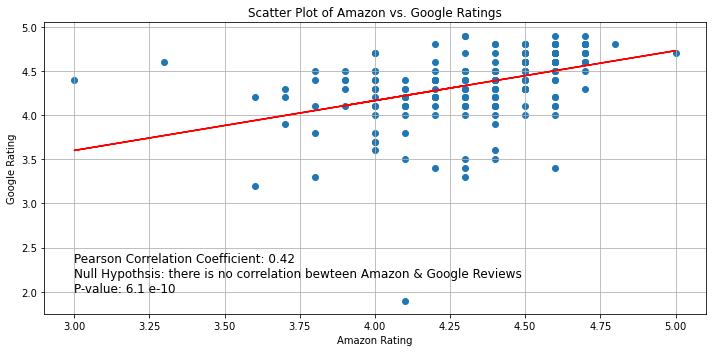

In [29]:
# Scatter plot to show correlation
import numpy as np 
plt.figure(figsize=(10, 5))
plt.scatter(df_sorted['Rating'], df_sorted['Google Rating'])
m, b = np.polyfit(df_sorted['Rating'], df_sorted['Google Rating'], 1)
plt.plot(df_sorted['Rating'], m * df_sorted['Rating'] + b, color='red')
plt.title('Scatter Plot of Amazon vs. Google Ratings')
plt.xlabel('Amazon Rating')
plt.ylabel('Google Rating')

plt.text(3, 2, 'Pearson Correlation Coefficient: 0.42\nNull Hypothsis: there is no correlation bewteen Amazon & Google Reviews\nP-value: 6.1 e-10', fontsize=12)

plt.grid(True)
plt.tight_layout()
plt.show()

In [30]:
# Transform Ratings For More Clear Meaning of What is Good, Avg and Bad
amz_mean = df_f['Rating'].mean()
goog_mean = df_f['Google Rating'].mean()

# Get each product's diff from mean rating
df_f['amz_mean_diff'] = df_f['Rating'] - amz_mean
df_f['goog_mean_diff'] = df_f['Google Rating'] - goog_mean

# Apply logarithmic transform with shift to ensure all values are positive
shift = min(df_f['amz_mean_diff'].min(), df_f['goog_mean_diff'].min())
shift = abs(shift) + 1  # Plus one to avoid log(0) if the minimum is a negative number
df_f['amz_log_transform'] = np.log(df_f['amz_mean_diff'] + shift)
df_f['goog_log_transform'] = np.log(df_f['goog_mean_diff'] + shift)

# Rescale back to a 1-5 range
def rescale(series):
    min_val = series.min()
    max_val = series.max()
    scale = 4 / (max_val - min_val)
    return (series - min_val) * scale + 1

df_f['amz_rescaled'] = rescale(df_f['amz_log_transform'])
df_f['goog_rescaled'] = rescale(df_f['goog_log_transform'])

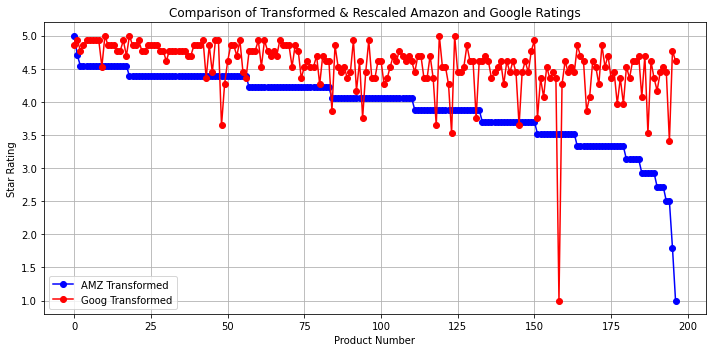

In [31]:
# Line graph of rescaled ratings comparison
df_sorted = df_f.sort_values('Rating', ascending = False)

df_sorted = df_sorted.reset_index(drop=True)

plt.figure(figsize=(10, 5))
# plt.plot(df_sorted.index, df_sorted['Rating'], marker='x', label='AMZ Rating', color = 'blue')
plt.plot(df_sorted.index, df_sorted['amz_rescaled'], marker='o', label='AMZ Transformed', color = 'blue')


# plt.plot(df_sorted.index, df_sorted['Google Rating'], marker='x', label='Goog Rating', color = 'red')
plt.plot(df_sorted.index, df_sorted['goog_rescaled'], marker='o', label='Goog Transformed', color = 'red')



plt.title('Comparison of Transformed & Rescaled Amazon and Google Ratings')
plt.xlabel('Product Number')
plt.ylabel('Star Rating')
plt.legend()
plt.grid(True)
# plt.text(50,2.1,"Pearson Correlation Coefficient: 0.34\nP-Value: 5.0 e-07", fontsize=12)

plt.tight_layout()
plt.show()

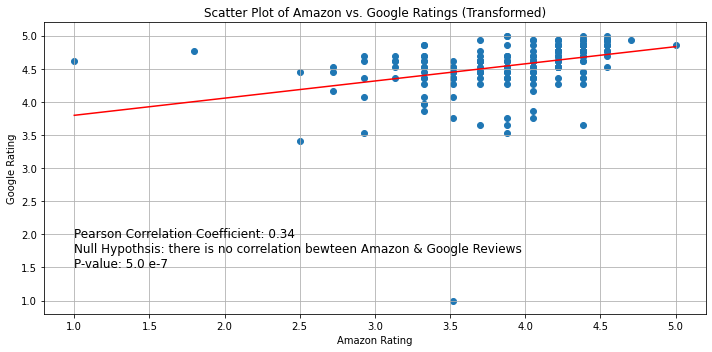

In [21]:
# Scatter plot of transformed ratings to show corr
plt.figure(figsize=(10, 5))
plt.scatter(df_sorted['amz_rescaled'], df_sorted['goog_rescaled'])
m, b = np.polyfit(df_sorted['amz_rescaled'], df_sorted['goog_rescaled'], 1)
plt.plot(df_sorted['amz_rescaled'], m * df_sorted['amz_rescaled'] + b, color='red')
plt.title('Scatter Plot of Amazon vs. Google Ratings (Transformed)')
plt.xlabel('Amazon Rating')
plt.ylabel('Google Rating')

plt.text(1, 1.5, 'Pearson Correlation Coefficient: 0.34\nNull Hypothsis: there is no correlation bewteen Amazon & Google Reviews\nP-value: 5.0 e-7', fontsize=12)

plt.grid(True)
plt.tight_layout()
plt.show()

In [32]:
# Calculate rescaled corr 
correlation, p_value = scipy.stats.pearsonr(df_f['amz_rescaled'], df_f['goog_rescaled'])

print("Pearson Correlation Coefficient:", correlation)
print("P-value:", p_value)


Pearson Correlation Coefficient: 0.3490222367917016
P-value: 4.993616528140507e-07


In [33]:
# Add in col of CS ratings scaled 1-5
df_f['cs_scaled'] = 1 + (df_f['CS Rating'] / 100) * 4

In [35]:
# Calculate corrs between CS and AMZ & GOOG transformed & rescaled
corr_cs_goog, p_value_cs_goog = pearsonr(df_f['cs_scaled'], df_f['goog_rescaled'])

corr_cs_amz, p_value_cs_amz = pearsonr(df_f['cs_scaled'], df_f['amz_rescaled'])

print(f"Correlation between CS Rating and Google: {corr_cs_goog}, P-value: {p_value_cs_goog}")
print(f"Correlation between CS Rating and Amazon: {corr_cs_amz}, P-value: {p_value_cs_amz}")


Correlation between CS Rating and Google: -0.005317063688246654, P-value: 0.940887729383702
Correlation between CS Rating and Amazon: -0.08151204947625555, P-value: 0.25483189740504253


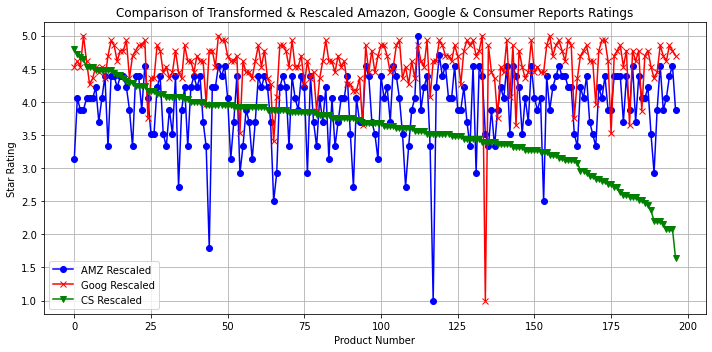

In [25]:
# Line graph of CS vs AMZ vs Goog transformed & rescaled ratings
df_sorted = df_f.sort_values('cs_scaled', ascending = False)

df_sorted = df_sorted.reset_index(drop=True)

plt.figure(figsize=(10, 5))
plt.plot(df_sorted.index, df_sorted['amz_rescaled'], marker='o', label='AMZ Rescaled', color = 'blue')
plt.plot(df_sorted.index, df_sorted['goog_rescaled'], marker='x', label='Goog Rescaled', color = 'red')
plt.plot(df_sorted.index, df_sorted['cs_scaled'], marker='v', label='CS Rescaled', color = 'green')


plt.title('Comparison of Transformed & Rescaled Amazon, Google & Consumer Reports Ratings')
plt.xlabel('Product Number')
plt.ylabel('Star Rating')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()